# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


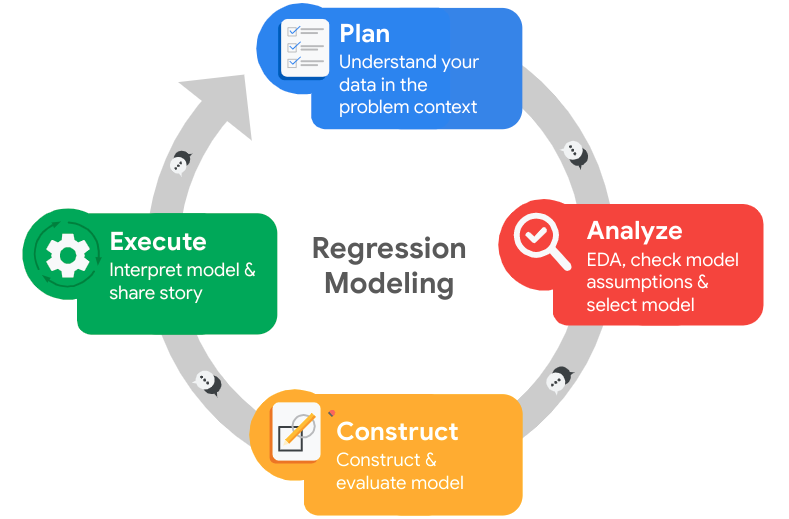

## **Pace: Plan**



### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import pickle

# For displaying all of the columns in dataframes (https://stackoverflow.com/questions/49188960/how-to-show-all-columns-names-on-a-large-pandas-dataframe)
pd.set_option('display.max_columns', None)

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into a dataframe

df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {'average_montly_hours' : 'average_monthly_hours',
                           'Work_accident' : 'work_accident',
                           'time_spend_company' : 'tenure',
                           'Department' : 'department',
                           'number_project' : 'number_of_projects'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_of_projects',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
# Check for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_of_projects       0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

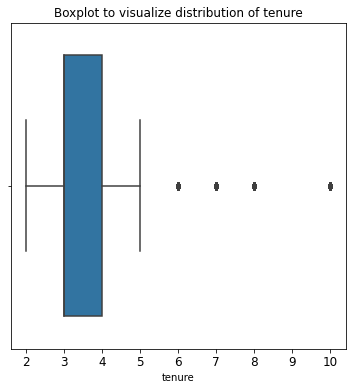

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to visualize distribution of tenure', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
sns.boxplot(x = df1['tenure'])
plt.show()

In [12]:
# Determine the number of rows containing outliers
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)

iqr = percentile75 - percentile25

lower_limit = percentile25 - iqr * 1.5
upper_limit = percentile75 + iqr * 1.5

outliers = df1[(df1['tenure'] < lower_limit) | (df1['tenure'] > upper_limit)]

print('lower limit : ', lower_limit)
print('upper limit : ', upper_limit)
print('Num of outliers in tenure : ', len(outliers))

lower limit :  1.5
upper limit :  5.5
Num of outliers in tenure :  824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())

# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize = True))

0    10000
1     1991
Name: left, dtype: int64
0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

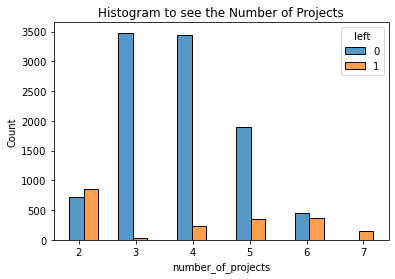

In [14]:
# Create a plot as to see a histogram to see the number of people who stayed and how many projects they had

sns.histplot(data = df1, x='number_of_projects', hue='left', multiple = 'dodge', shrink = 3)
plt.title('Histogram to see the Number of Projects')
plt.show()

From the plot above we can see the relation number of projects has on whether an employee leaves or not, we can see in this case, that: 
- There are 2 groups of employees who left, employees who worked minimal projects and left (could possibily be fired/leaving) and those who worked more projects (could be overworked).
- Every employee who worked 7 projects left.

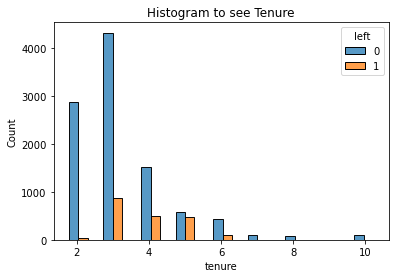

In [15]:
# Create a plot to see a histogram to see the tenure 

sns.histplot(data = df1, x='tenure', hue='left', multiple = 'dodge', shrink = 6)
plt.title('Histogram to see Tenure')
plt.show()

From the plot above we can see the relation tenure has on whether an employee leaves or not:
- We can see from the plot that the majority of people who leave the company leave during their 3rd, 4th or 5th year.
- As tenure reaches 7 years and above we don't have any record of an employee leaving.

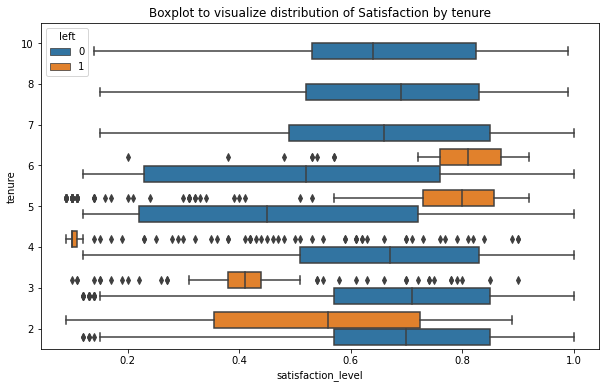

In [16]:
# Create a plot to see satisfaction levels and tenure using a boxplot

plt.figure(figsize = (10,6))
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h")
plt.gca().invert_yaxis()
plt.title('Boxplot to visualize distribution of Satisfaction by tenure', fontsize = 12)
plt.show()

From the plot above we can visualize the distribution of Satisfaction by tenure:
- Generally employees who leave are dissatisfied employees in their early years or satisfied employees in their 5th and 6th years.
- Employees who left in their 4th year had an unusually low level of satisfaction.

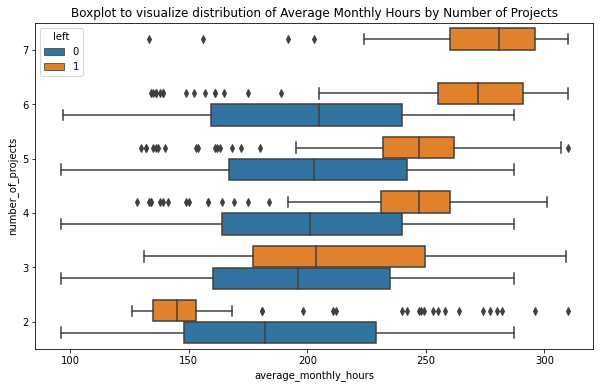

In [17]:
# Create a plot to see average monthly hours and number of projects using a boxplot

plt.figure(figsize = (10,6))
sns.boxplot(data=df1, x='average_monthly_hours', y='number_of_projects', hue='left', orient="h")
plt.gca().invert_yaxis()
plt.title('Boxplot to visualize distribution of Average Monthly Hours by Number of Projects', fontsize = 12)
plt.show()

From the plot above we can visulize the distribution of Average Monthly Hours by number of projects:
- Employees who left had high average of monthly hours worked (Average = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month) and large amount of project to complete.
- There were cases where employees who were underworked with fewer average monthly hours and number of projects left.

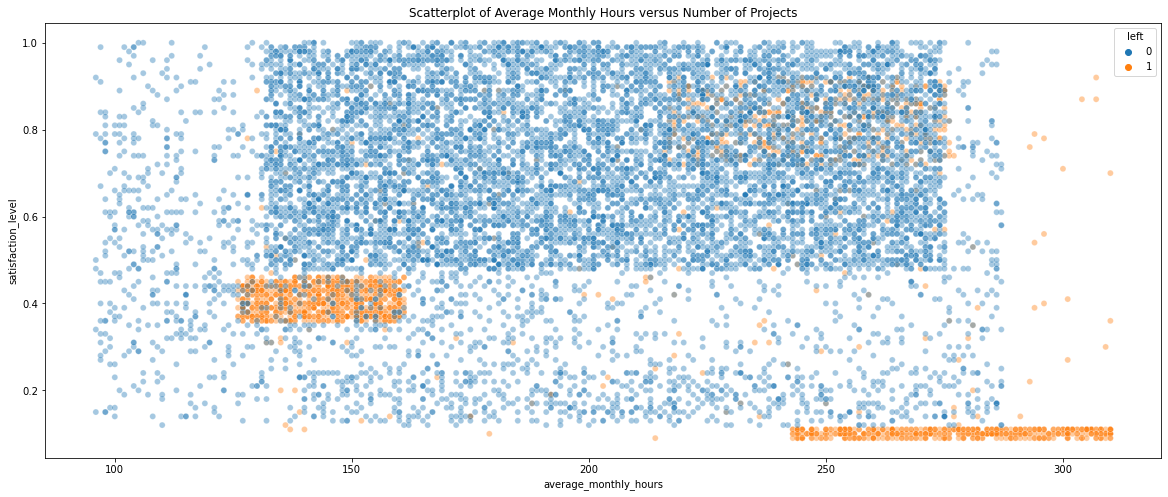

In [18]:
# Scatterplot to see average_monthly_hours worked versus satisfaction_level 

plt.figure(figsize = (20,8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha = 0.4)

plt.title('Scatterplot of Average Monthly Hours versus Number of Projects', fontsize = 12)
plt.show()

From the Scatterplot above we can infer:
- There is a group of employees who worked less average hours(130 ~ 165) and had a low satisfaction level who left.
- There is a group of employees who worked a very high number of average Monthly hours (245 ~ 320). They had a very low satisfaction level which could be attributed to being overworked.
- There is also a group of employees who left who had high average Monthly hours (220 ~ 270) and high satifaction score.

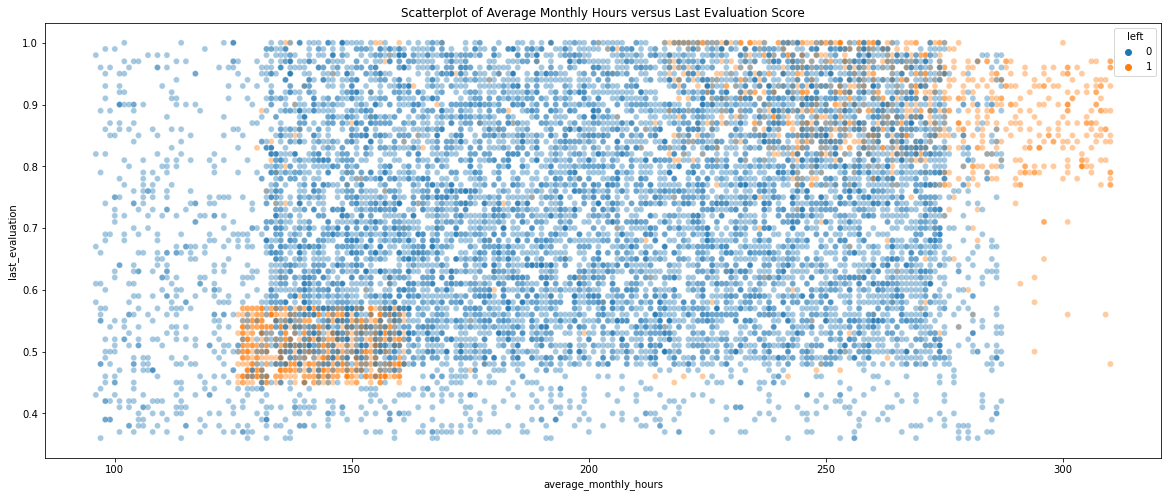

In [19]:
# Scatterplot to see average_monthly_hours versus last_evaluation

plt.figure(figsize = (20,8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left', alpha = 0.4)

plt.title('Scatterplot of Average Monthly Hours versus Last Evaluation Score', fontsize = 12)
plt.show()

From the Scatterplot above we can infer:
- There are 2 groups of employees who left, employees who performed well on their last evaluation and worked a high number of average monthly hours, and  employees who performed poorly on their last evaluation and worked fewer hours.

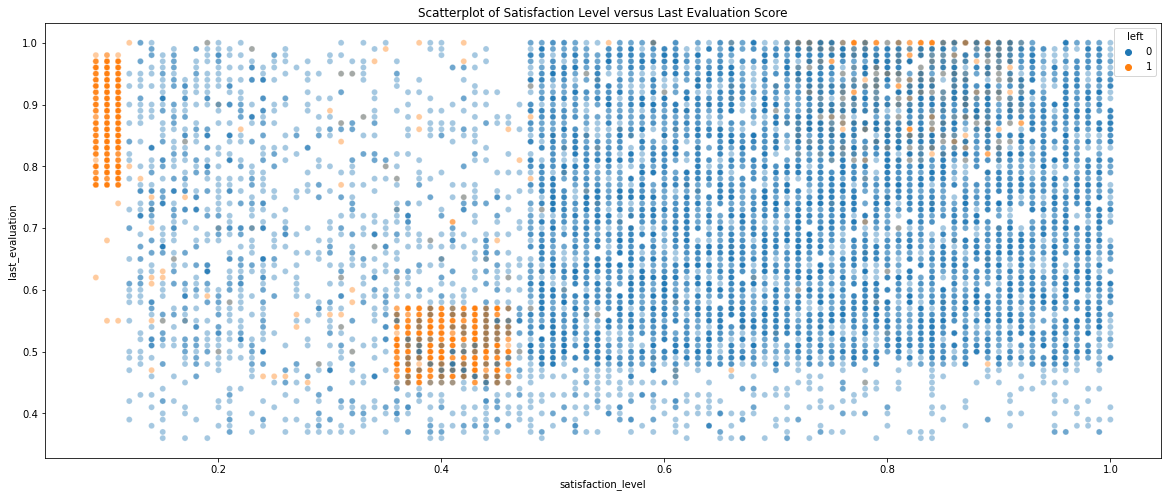

In [20]:
# Scatterplot to see satisfaction level versus last_evaluation

plt.figure(figsize = (20,8))
sns.scatterplot(data=df1, x='satisfaction_level', y='last_evaluation', hue='left', alpha = 0.4)

plt.title('Scatterplot of Satisfaction Level versus Last Evaluation Score', fontsize = 12)
plt.show()

From the Scatterplot above we can infer:
- There are 2 significant groups of employees who left, employees who performed well in their past evaluation but had a very low satisfaction score and employees who had poor evaluation and poor satifaction level.
- There were some cases of employees leaving with high satisfaction and good past performance.

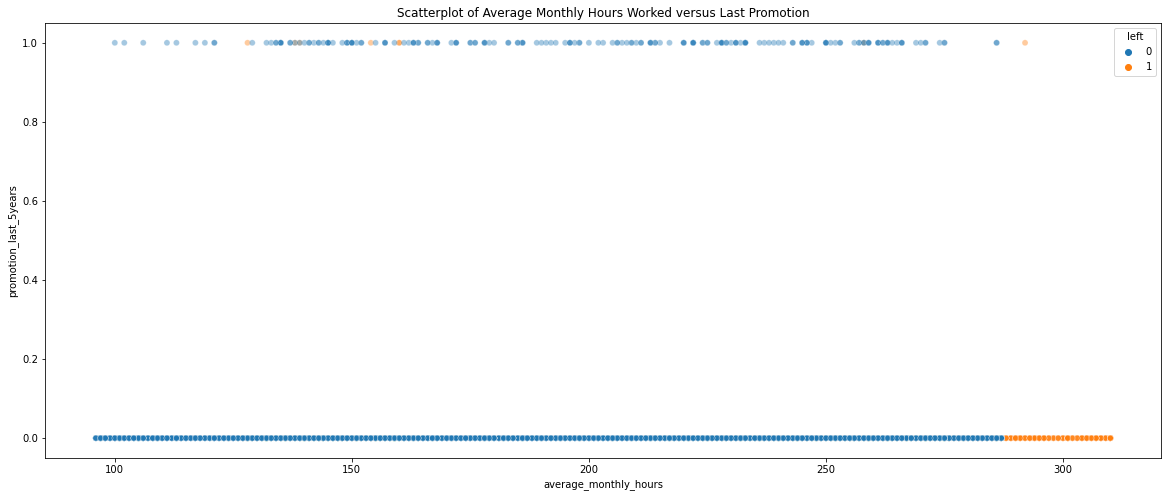

In [73]:
# Scatterplot to see average_monthly_hours versus promotion_past_5years

plt.figure(figsize = (20,8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha = 0.4)

plt.title('Scatterplot of Average Monthly Hours Worked versus Last Promotion', fontsize = 12)
plt.show()


From the Scatterplot above we can infer:
- Employees who worked the highest number of average monthly hours and didn't get promoted left.

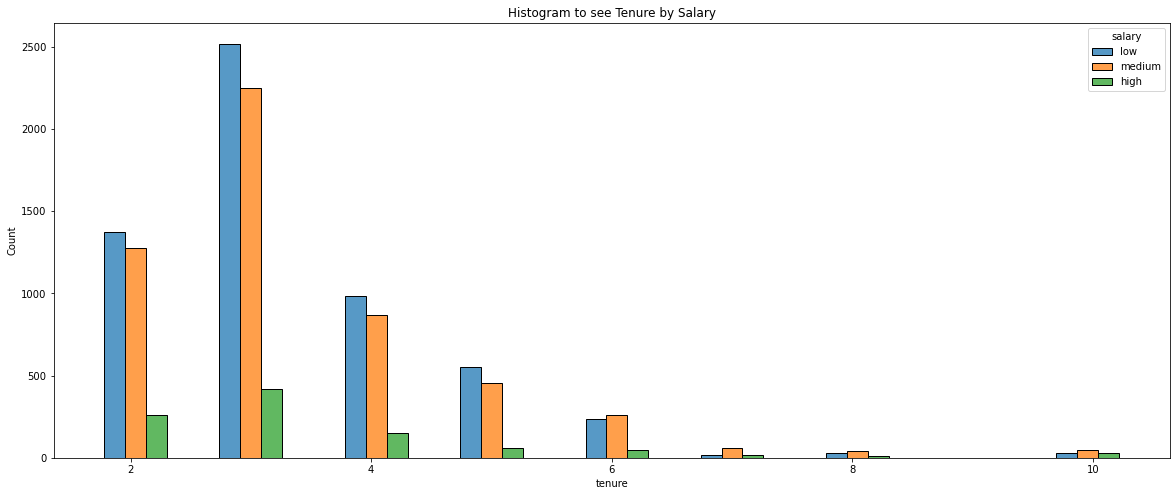

In [22]:
# Create a plot to see the relationship between tenure and salary

plt.figure(figsize = (20,8))
sns.histplot(data = df1, x='tenure', hue='salary', multiple = 'dodge', shrink = 6)
plt.title('Histogram to see Tenure by Salary')
plt.show()

From the plot above we can infer:
- There is a good proportion of salary as tenure increases and it is not only comprised of high salary employees.

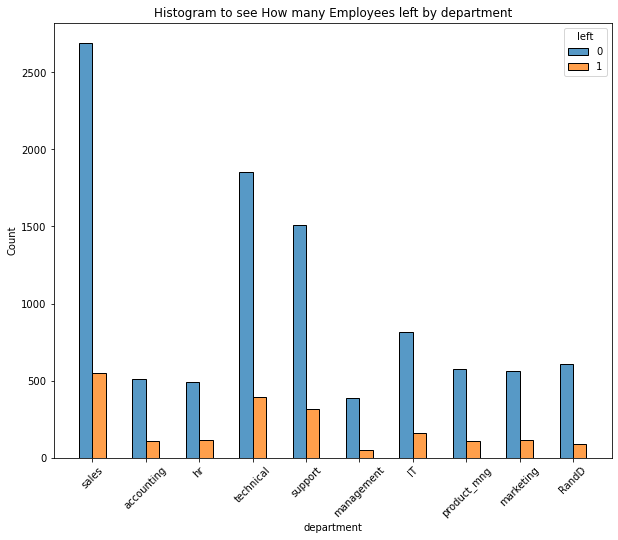

In [23]:
# Create a plot to see the distrabution of people who left by department

plt.figure(figsize = (10,8))
sns.histplot(data = df1, x='department', hue='left', multiple = 'dodge', shrink = 0.5)
plt.title('Histogram to see How many Employees left by department')
plt.xticks(rotation='45')
plt.show()

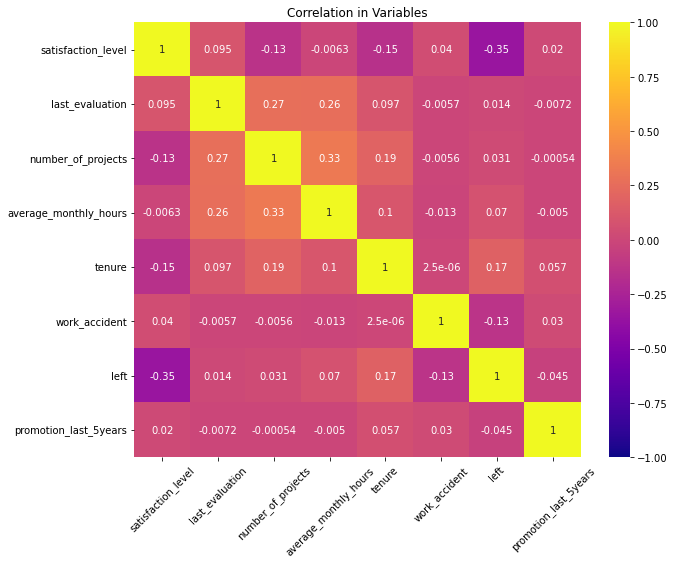

In [24]:
# A Heatmap to see the correlations in variables in the data

plt.figure(figsize = (10,8))
sns.heatmap(df1.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'plasma')
plt.title('Correlation in Variables')
plt.xticks(rotation='45')
plt.show()


### Insights

From the visualisations we can see that employees are leaving due to being overworked which could be a result of poor management. Employees who leave generally have worked longer hours with lower satifaction and have had a high number of projects under their belt. Employees who work the longest hours with no promotion have also left.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Modeling - Decision Trees

Add as many cells as you need to conduct the modeling process.

#### Feature Engeneering

In [25]:
df_encoded = df1.copy()
df_encoded.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [26]:
# Converting the categorical variables 'Salary' and 'department'

df_encoded = pd.get_dummies(df_encoded, columns = ['department'], drop_first = False)

df_encoded['salary'] = df_encoded['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

df_encoded.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


#### Training and Building Model

In [27]:
y = df_encoded['left']

X = df_encoded.drop('left', axis= 1)

In [28]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [29]:
X.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [30]:
# Using Train Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

##### Decision Tree

In [31]:
# Creating a decision tree model
tree = DecisionTreeClassifier(random_state= 42)
cv_params = {'max_depth' : [4,6,8,None],
             'min_samples_leaf' : [2,5,1],
             'min_samples_split' : [2,4,6]}
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
tree1 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc' )

In [32]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 2.81 s, sys: 0 ns, total: 2.81 s
Wall time: 2.81 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [33]:
tree1.best_score_

0.9758952535925409

In [34]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [35]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [36]:
tree1_results = make_results('decision tree cv', tree1, 'auc')
tree1_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.966878,0.918288,0.941941,0.981208,0.975895


#### Create a Random Forest

In [37]:
# Creating a random forest model
rf = RandomForestClassifier(random_state = 42)

cv_params = {'max_depth' : [3,5,None],
             'max_features' : [1.0],
             'max_samples' : [0.7, 1.0],
             'min_samples_leaf' : [1,2,3],
             'min_samples_split' : [2,3,4],
             'n_estimators' : [300, 500]}
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf1 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [38]:
%%time
rf1.fit(X_train, y_train)

CPU times: user 9min 8s, sys: 861 ms, total: 9min 9s
Wall time: 9min 9s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [39]:
rf1.best_score_

0.9819627407970256

In [40]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [41]:
rf1_results = make_results('random forest cv', rf1, 'auc')
rf1_results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.946285,0.918956,0.932377,0.977872,0.981963


In [42]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [43]:
# Get prediction results

rf1_test_scores = get_scores("random forest test", rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest test,0.960334,0.923695,0.941658,0.980987,0.958047


#### Feature  Engineering - Creating a new feature

In [44]:
df_encoded_new = df_encoded.copy()
df_encoded_new.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [45]:
# Create a new Overworked column 
df_encoded_new['overworked'] = df_encoded_new['average_monthly_hours']
df_encoded_new.head()


,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,157
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,262
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,272
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,223
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,159


In [46]:
# check max and min monthly work times

print('Max time worked : ', df_encoded_new['overworked'].max())
print('Min time worked : ', df_encoded_new['overworked'].min())

Max time worked :  310
Min time worked :  96


In [47]:
# Change overworked to binary where if you work over 175 hrs your overworked and remove average_monthly_hours and satisfaction columns
df_encoded_new['overworked'] = (df_encoded_new['overworked'] > 175).astype(int)

df_encoded_new = df_encoded_new.drop('average_monthly_hours', axis = 1)
df_encoded_new = df_encoded_new.drop('satisfaction_level', axis = 1)

df_encoded_new.head()


,last_evaluation,number_of_projects,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Training and Model Building 

In [48]:
y = df_encoded_new['left']
X = df_encoded_new.drop('left', axis = 1)

In [49]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [50]:
X.head()

,last_evaluation,number_of_projects,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [51]:
# using train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 42)

#### Decision Tree - New

In [52]:
tree = DecisionTreeClassifier(random_state= 42)
cv_params = {'max_depth' : [4,6,8,None],
             'min_samples_leaf' : [2,5,1],
             'min_samples_split' : [2,4,6]}
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}
tree2 = GridSearchCV(tree, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc' )

In [53]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.38 s, sys: 5 µs, total: 2.38 s
Wall time: 2.38 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         

In [54]:
tree2.best_score_

0.9560690460829713

In [55]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [56]:
tree2_results = make_results("Decision tree new cv", tree2, 'auc')
tree2_results

,model,precision,recall,F1,accuracy,auc
0,Decision tree new cv,0.831453,0.902894,0.864811,0.952851,0.956069


In [57]:
# Comparing results to tree1

print(tree1_results)
print(tree2_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.966878  0.918288  0.941941  0.981208  0.975895
                  model  precision    recall        F1  accuracy       auc
0  Decision tree new cv   0.831453  0.902894  0.864811  0.952851  0.956069


#### Random Forest -  New

In [58]:
rf = RandomForestClassifier(random_state = 42)

cv_params = {'max_depth' : [3,5,None],
             'max_features' : [1.0],
             'max_samples' : [0.7, 1.0],
             'min_samples_leaf' : [1,2,3],
             'min_samples_split' : [2,3,4],
             'n_estimators' : [300, 500]}
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

rf2 = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = 'roc_auc')

In [59]:
%%time
rf2.fit(X_train, y_train)

CPU times: user 6min 57s, sys: 1.01 s, total: 6min 58s
Wall time: 6min 58s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [60]:
rf2.best_score_

0.9673141551136663

In [61]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 300}

In [62]:
rf2_results = make_results('Random Forest new cv', rf2, 'auc')
rf2_results

,model,precision,recall,F1,accuracy,auc
0,Random Forest new cv,0.855755,0.896177,0.875413,0.957633,0.967314


In [63]:
rf2_test_scores = get_scores('Random forest new test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,Random forest new test,0.868571,0.915663,0.891496,0.962975,0.944031


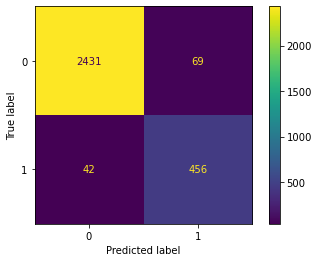

In [64]:
# Creating a Confusion Matrix to get the TP, TN, FP, FN scores

preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels = rf2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = rf2.classes_)
disp.plot(values_format = '')

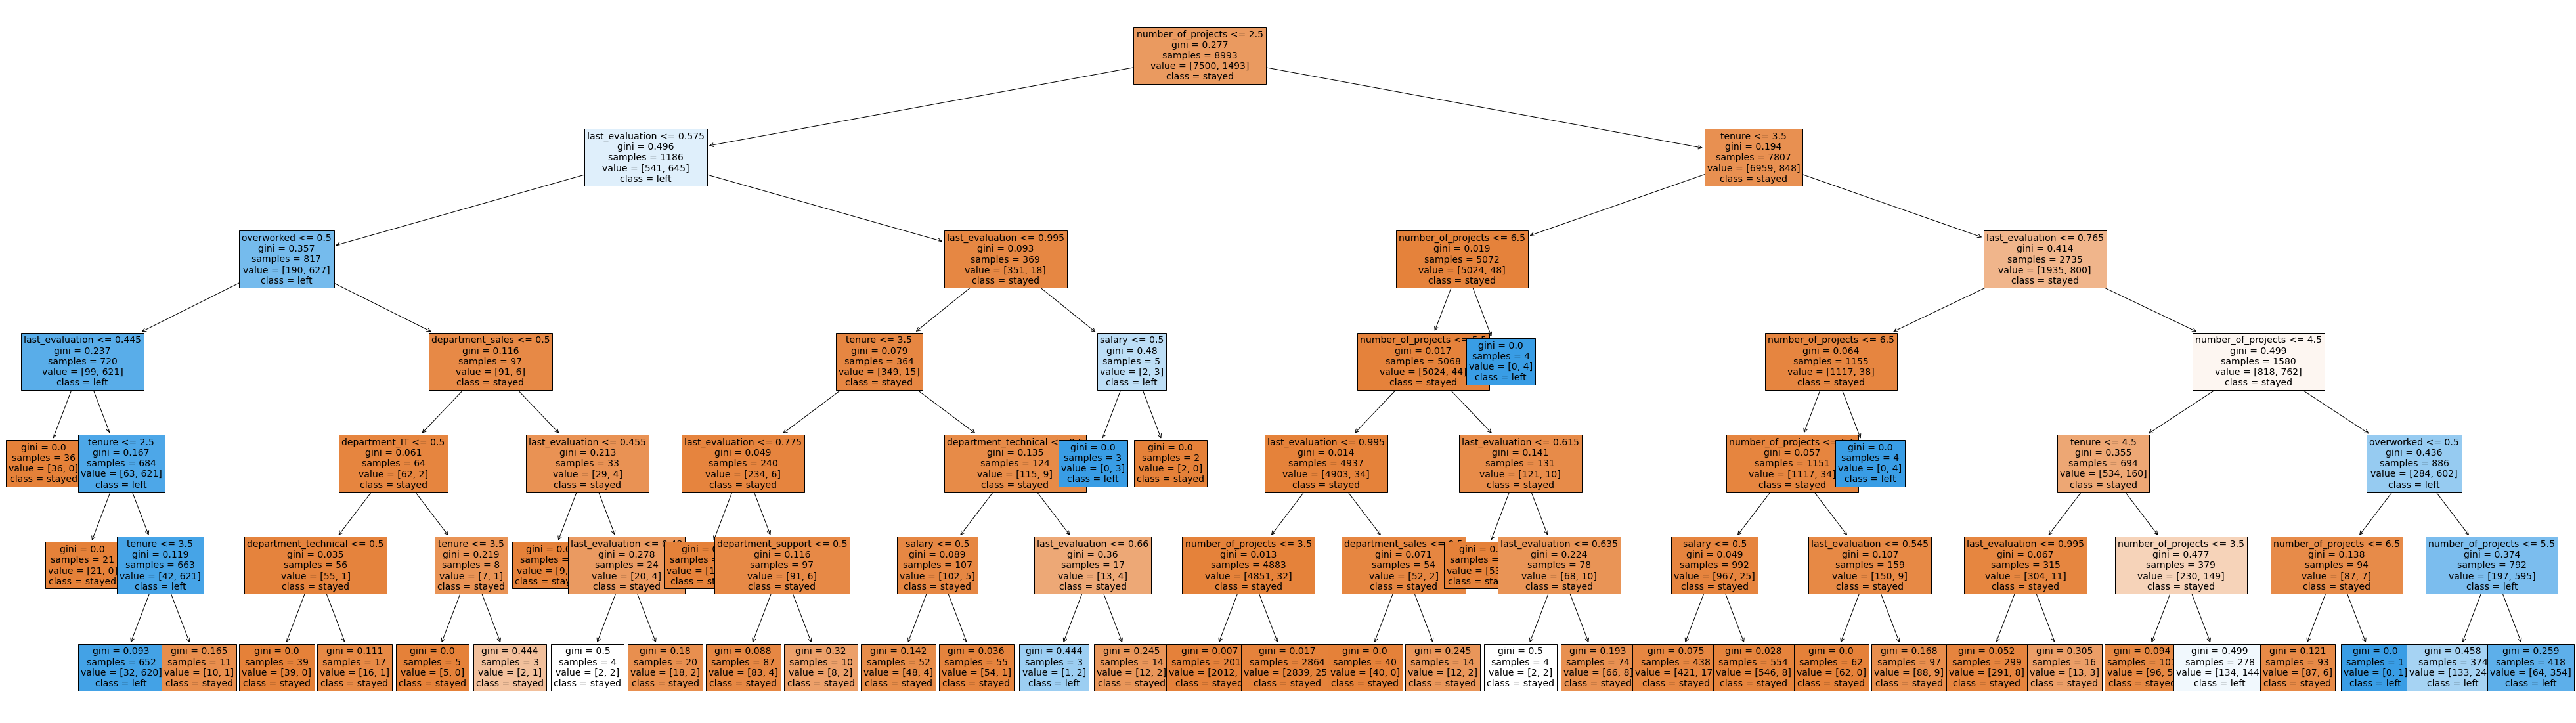

In [65]:
# see the Decision tree 
plt.figure(figsize= (70,20))
plot_tree(tree2.best_estimator_, max_depth = 6, fontsize = 14, filled = True, feature_names = X.columns, 
         class_names = {0 : 'stayed', 1 : 'left'})
plt.show()

### Feature Importance

#### --> Decision Tree

In [66]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_of_projects,0.343930
last_evaluation,0.335089
tenure,0.213517
overworked,0.104462
salary,0.001610
department_technical,0.000630
department_sales,0.000434
department_support,0.000238
department_IT,0.000090


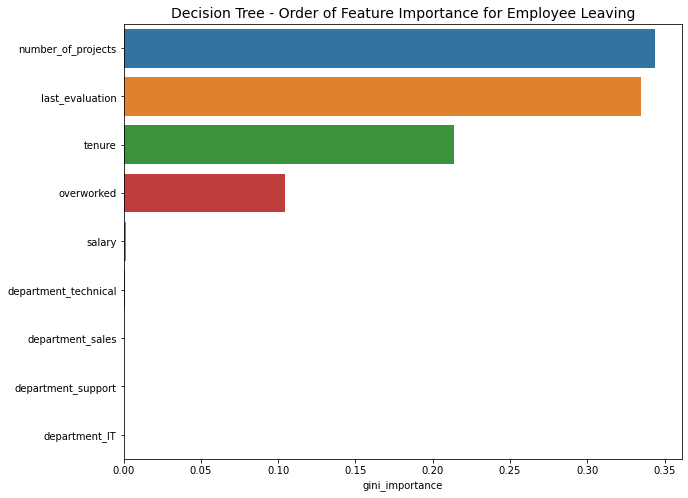

In [72]:
plt.figure(figsize = (10,8))
sns.barplot(data = tree2_importances, x = 'gini_importance', y = tree2_importances.index)
plt.title("Decision Tree - Order of Feature Importance for Employee Leaving", fontsize = 14)
plt.show()

#### --> Random Forest

In [68]:
feat_importance = rf2.best_estimator_.feature_importances_
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]
feat = X.columns[ind]

feat_importance = feat_importance[ind]
y_df = pd.DataFrame({'Feature' : feat, 'Importance': feat_importance})
y_df_sorted = y_df.sort_values('Importance', ascending = [False])
y_df_sorted.head(10)

,Feature,Importance
9,last_evaluation,0.352478
7,number_of_projects,0.348363
8,tenure,0.194959
6,overworked,0.100266
3,salary,0.000796
5,department_IT,0.000697
4,department_technical,0.000662
2,department_support,0.000525
1,department_sales,0.000506
0,department_RandD,0.000164


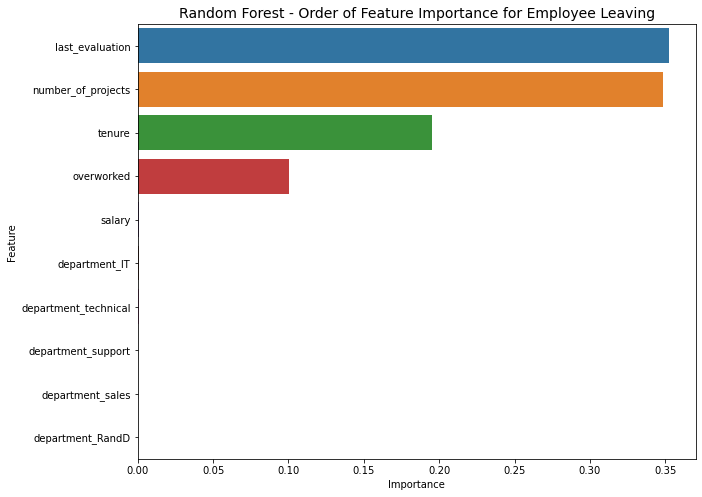

In [71]:
plt.figure(figsize = (10,8))
#sns.barplot(data = y_df_sorted, x = 'Feature', y = 'Importance')
sns.barplot(data = y_df_sorted, x = 'Importance', y = 'Feature')
plt.title("Random Forest - Order of Feature Importance for Employee Leaving", fontsize = 14)
plt.show()

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

- After conducting feature engineering and adding the new feature 'overworked' the random forest model achieved AUC of 94.4%, precision of 86.9%, recall of 91.6%, f1-score of 89.1%, and accuracy of 96.3%, on the test set.

### Conclusion, Recommendations

- The models and the feature importances above confirm that the employees are being overworked.

Recommendations:
- Limit the number of project an employee can work on, or at least ensure that they are capable of handling the workload.
- Employees who work longer hours and perform well should be rewarded by the company and promoted.
- The company should set guidlines for employees with regards to expectations for workload, and the overtime policy of the company.
- Investigate why employees who leave after 4 years have unusually low satisfaction levels.
